In [ ]:
! pip install fastai==2.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 191 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 4.7 MB/s 
     |████████████████████████████████| 12.8 MB 24.6 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following d

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import glob

import nibabel as nib
import cv2
import imageio
from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image

In [ ]:
# !pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html > /dev/null
# !pip install --upgrade kornia > /dev/null
# !pip install allennlp==1.1.0.rc4 > /dev/null

In [ ]:
# !pip install --upgrade fastai > /dev/null
#import fastai; fastai.__version__

'2.5.3'

In [ ]:
#!pip list

In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a meta file for nii files processing

file_list = []
for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/LITS Challenge/Training Batch 1'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        file_list.append((dirname,filename))

for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/LITS Challenge/Training Batch 2'):
    for filename in filenames:
        file_list.append((dirname,filename))

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename'])
df_files.sort_values(by=['filename'], ascending=True)


,dirname,filename
1,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-0.nii
3,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-1.nii
21,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-10.nii
200,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-100.nii
202,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-101.nii
...,...,...
189,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-95.nii
191,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-96.nii
193,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-97.nii
195,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-98.nii


In [ ]:
# Map CT scan and label 

df_files["mask_dirname"] = "" ; df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    p=""
    if i<=27 :
      p = r"/content/drive/MyDrive/LITS Challenge/Training Batch 1"
    else :
      p = r"/content/drive/MyDrive/LITS Challenge/Training Batch 2"
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = p

df_files_test= df_files[df_files.mask_filename=='']
# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 
print(len(df_files))
df_files
#df_files_test

131


,dirname,filename,mask_dirname,mask_filename
0,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-0.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-0.nii
1,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-1.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-1.nii
2,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-10.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-10.nii
3,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-100.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-100.nii
4,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-101.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-101.nii
...,...,...,...,...
126,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-95.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-95.nii
127,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-96.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-96.nii
128,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-97.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-97.nii
129,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-98.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-98.nii


In [ ]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [ ]:
# Read sample
sample = 3
sample_ct   = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask  = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
print(sample_ct.shape) 
print(sample_mask.shape)
print(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

(512, 512, 685)
(512, 512, 685)
/content/drive/MyDrive/LITS Challenge/Training Batch 2/volume-100.nii


In [ ]:
print(np.amin(sample_ct), np.amax(sample_ct))
print(np.amin(sample_mask), np.amax(sample_mask))

-1024.0 3071.0
0.0 2.0


In [ ]:
# Preprocess the nii file 
# Source https://docs.fast.ai/medical.imaging

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

## Plot an image

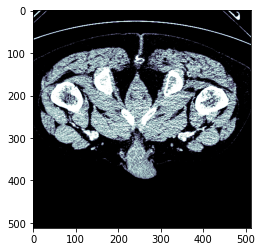

In [ ]:
plt.imshow(tensor(sample_ct[...,50].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')


    plt.show()

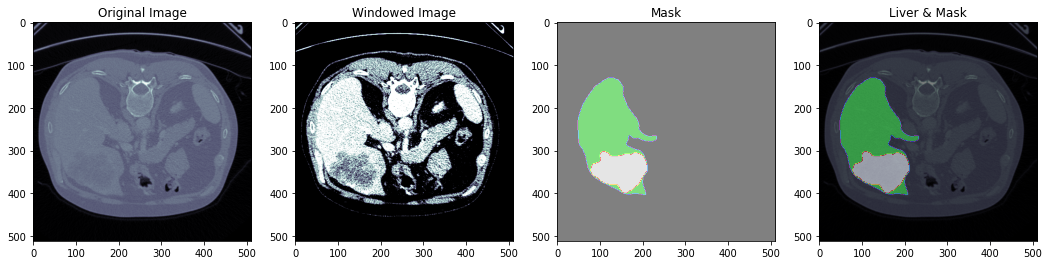

In [ ]:
sample=502 # this is basically the slice
sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[...,sample], sample_mask[...,sample]])

(512, 512)
[[     0 231952]
 [     1  21524]
 [     2   8668]]


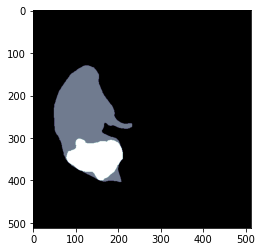

In [ ]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
print(mask.shape)
unique, counts = np.unique(mask, return_counts=True)
print( np.array((unique, counts)).T)
plt.imshow(mask , cmap = 'bone')

In [ ]:
# Preprocessing functions
# Source https://docs.fast.ai/medical.imaging

class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=90):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

## Test plot

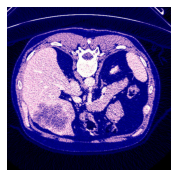

In [ ]:
_,axs=subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver,dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0])
#show_image(Image.open('test.png'), ax=axs[0])

In [ ]:
# df_files=df_files[100:131]
#df_files=df_files[100:111] 
#df_files


df_files=df_files[0:50]
df_files

#test = df_files[101:130]


,dirname,filename,mask_dirname,mask_filename
0,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-0.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-0.nii
1,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-1.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-1.nii
2,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-10.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-10.nii
3,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-100.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-100.nii
4,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-101.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-101.nii
5,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-102.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-102.nii
6,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-103.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-103.nii
7,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-104.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-104.nii
8,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-105.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-105.nii
9,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-106.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-106.nii


In [ ]:
# Make custom JPG files for Unet training
# Total number of 131 nii files contains 67072 slices 

GENERATE_JPG_FILES = True   # warning: generation takes ~ 1h
slice_sum=0
if (GENERATE_JPG_FILES):
    
    path = Path(".")

    os.makedirs('train_images',exist_ok=True)
    os.makedirs('train_masks',exist_ok=True)

    for ii in tqdm(range(0,len(df_files))): # take 1/3 nii files for training
        curr_ct        = read_nii(df_files.loc[ii,'dirname']+"/"+df_files.loc[ii,'filename'])
        curr_mask      = read_nii(df_files.loc[ii,'mask_dirname']+"/"+df_files.loc[ii,'mask_filename'])
        curr_file_name = str(df_files.loc[ii,'filename']).split('.')[0]
        curr_dim       = curr_ct.shape[2] # 512, 512, curr_dim
        slice_sum = slice_sum+curr_dim
        
        for curr_slice in range(0,curr_dim,1): # export every 2nd slice for training
            data = tensor(curr_ct[...,curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")
            
else:
    
    path = Path("../content") # read jpg from saved kernel output
print(slice_sum)

  0%|          | 0/50 [00:00<?, ?it/s]

30027


In [ ]:
# !zip -q -r train_masks.zip "./train_masks"
# !zip -q -r train_images.zip "./train_images"

In [ ]:
# !rm -rf ./train_images
# !rm -rf ./train_masks

# MODEL TRAINING

In [ ]:
bs = 16
im_size = 128

codes = np.array(["background","liver","tumor"])
    
def get_x(fname:Path): 
    return fname

def label_func(x): 
    return path/'train_masks'/f'{x.stem}_mask.png'

tfms = [IntToFloatTensor(),Normalize()]

db = DataBlock(blocks=(ImageBlock(),MaskBlock(codes)),  #codes = {"Backround": 0,"Liver": 1,"Tumor": 2}
               batch_tfms=tfms,
               splitter=RandomSplitter(),
               item_tfms=[Resize(im_size)],
               get_items=get_image_files,
               get_y=label_func
              )

# ../output/kaggle/working/train_images.zip
# ds = db.datasets(source=path/'train_images.zip')
ds = db.datasets(source='./train_images')
print(len(ds))
print(ds)

30027
(#30027) [(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512)...]


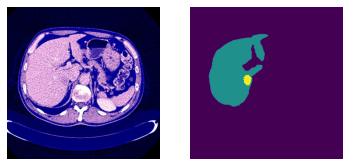

In [ ]:
idx=55
imgs = [ds[idx][0],ds[idx][1]]
fig,axs = plt.subplots(1, 2)
for i,ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(imgs[i]) #, cmap='gray'

In [ ]:
unique, counts = np.unique(array(ds[idx][1]), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 233294]
 [     1  28128]
 [     2    722]]


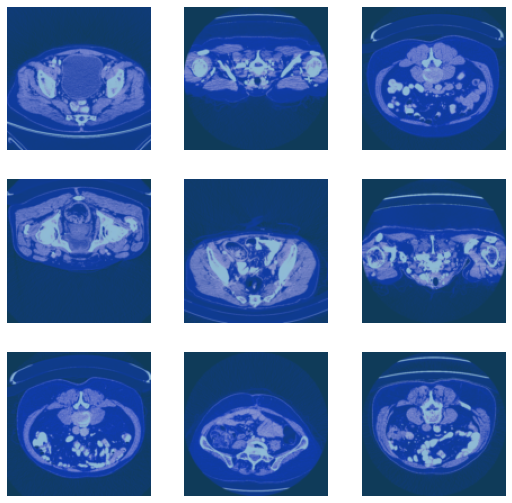

In [ ]:
dls = db.dataloaders(path/'train_images',bs = bs) #, num_workers=0
dls.show_batch()

In [ ]:
def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

In [ ]:
learn = unet_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(axis=1), metrics=[foreground_acc, cust_foreground_acc])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
print(learn.summary())

DynamicUnet (Input shape: 16)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                     

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(3, wd=0.1, cbs=SaveModelCallback() )

epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.006149,0.006549,nan,0.998100,06:12


Better model found at epoch 0 with valid_loss value: 0.006549294572323561.


epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.003204,0.003021,nan,0.998815,06:26
1,0.002558,0.002402,nan,0.999028,06:26
2,0.002094,0.002130,nan,0.999129,06:24


Better model found at epoch 0 with valid_loss value: 0.0030209552496671677.
Better model found at epoch 1 with valid_loss value: 0.002402188954874873.
Better model found at epoch 2 with valid_loss value: 0.0021295540500432253.


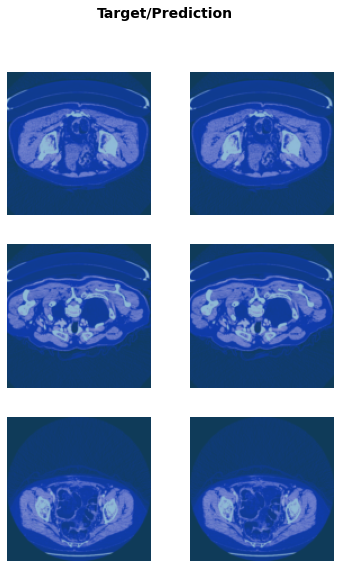

In [ ]:
learn.show_results()

In [ ]:
# Save the model
learn.export(path/f'Liver_segmentation')

In [ ]:
import gc
del learn
gc.collect()
torch.cuda.empty_cache()

# TESTING MODEL

### Run this cell to do the required imports

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import glob

import nibabel as nib
import cv2
import imageio
from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image


import fastai; 
print(fastai.__version__)
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

2.2.5


#### Run this cell to make sure the data files are loaded into a variable called as `df_files` (it has to a pandas dataframe) This cell also defines the function required for nii file format conversion

In [ ]:
# Create a meta file for nii files processing

file_list = []
for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/LITS Challenge/Training Batch 1'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        file_list.append((dirname,filename)) 

for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/LITS Challenge/Training Batch 2'):
    for filename in filenames:
        file_list.append((dirname,filename))

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename'])


# Map CT scan and label 
df_files["mask_dirname"] = "" ; df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    p=""
    if i<=27 :
      p = r"/content/drive/MyDrive/LITS Challenge/Training Batch 1"
    else :
      p = r"/content/drive/MyDrive/LITS Challenge/Training Batch 2"
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = p

df_files_test= df_files[df_files.mask_filename=='']
# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 
print(len(df_files))


# function used to read nii files and convert into a numpy array
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)
df_files

131


,dirname,filename,mask_dirname,mask_filename
0,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-0.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-0.nii
1,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-1.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-1.nii
2,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-10.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-10.nii
3,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-100.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-100.nii
4,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-101.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-101.nii
...,...,...,...,...
126,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-95.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-95.nii
127,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-96.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-96.nii
128,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-97.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-97.nii
129,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-98.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-98.nii


### Use the below cell to split the dataset into test and train. This assumes that the same split was used for training the model and the model has not seen the test datas

In [ ]:
# df_files=df_files[100:131]
# df_files

# first 20 data points
df_file = df_files[51:70]
df_file
#print(df_file.loc[69, 'dirname'])

,dirname,filename,mask_dirname,mask_filename
51,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-27.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-27.nii
52,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-28.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-28.nii
53,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-29.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-29.nii
54,/content/drive/MyDrive/LITS Challenge/Training Batch 1,volume-3.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 1,segmentation-3.nii
55,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-30.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-30.nii
56,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-31.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-31.nii
57,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-32.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-32.nii
58,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-33.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-33.nii
59,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-34.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-34.nii
60,/content/drive/MyDrive/LITS Challenge/Training Batch 2,volume-35.nii,/content/drive/MyDrive/LITS Challenge/Training Batch 2,segmentation-35.nii


### Below cell imports the trained model and also defines a few variables and functions required for the tetsing.

Defining things required for loading the model

In [ ]:
# Load saved model
bs = 16
im_size = 128
#im_size=512

# the labels used for the classes
# When predicting the model predicts it in terms of indices (ie 0 --> background, 1 --> liver ...)
codes = np.array(["background","liver","tumor"])

# the default pathb
path = './'

def get_x(fname:Path): 
    return fname

def label_func(x): 
    return path/'train_masks'/f'{x.stem}_mask.png'

def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

## Loading the model

In [ ]:
# loading the tensor flow model
tfms = [Resize(im_size), IntToFloatTensor(),Normalize()]
learn0 = load_learner('/content/Liver_segmentation',cpu=False )
learn0.dls.transform = tfms
#print(im_size)

### Below function helps to convert the nii file to the format used by the model. So that prediction is possible

In [ ]:
def nii_tfm(fn,wins): 

    test_nii  = read_nii(fn)
    curr_dim  = test_nii.shape[2] # 512, 512, curr_dim
    slices = []
    
#     for curr_slice in range(curr_dim):
#         data = tensor(test_nii[...,curr_slice].astype(np.float32))
#         data = (data.to_nchan(wins)*255).byte()
#         slices.append(TensorImage(data))
        
#     return slices
    data = tensor(test_nii[...,450].astype(np.float32))
    data = (data.to_nchan(wins)*255).byte()
    slices.append(TensorImage(data))
#     data = tensor(test_nii[...,351].astype(np.float32))
#     data = (data.to_nchan(wins)*255).byte()
#     slices.append(TensorImage(data))
    print(slices)
    return slices

###CORRECT NII_TFM

In [ ]:
def nii_tfm(fn,wins): 

    test_nii  = read_nii(fn)
    curr_dim  = test_nii.shape[2] # 512, 512, curr_dim
    slices = []
    
    for curr_slice in range(curr_dim):
        data = tensor(test_nii[...,curr_slice].astype(np.float32))
        data = (data.to_nchan(wins)*255).byte()
        slices.append(TensorImage(data))
                      
    return slices 

### Selecting the test number and the slice number for which the prediction is to be done

(512, 512, 122)


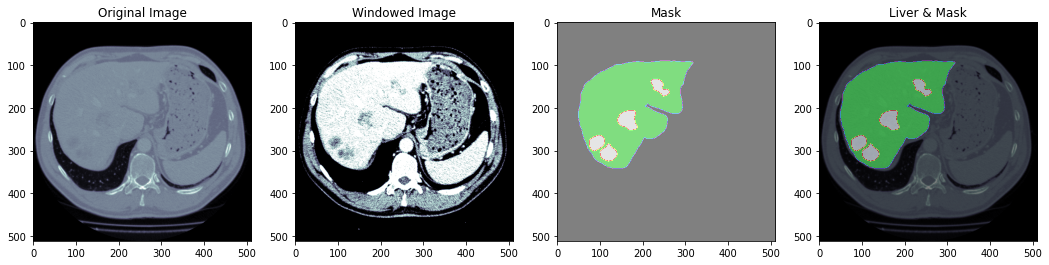

In [ ]:
# test number
tst = 66

# slice number
test_slice_idx = 85


test_nii   = read_nii(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'])
test_mask  = read_nii(df_files.loc[tst,'mask_dirname']+"/"+df_files.loc[tst,'mask_filename'])
print(test_nii.shape)

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

In [ ]:
# Prepare a nii test file for prediction 

test_files = nii_tfm(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'],[dicom_windows.liver, dicom_windows.custom])
print("Number of test slices: ",len(test_files))

Number of test slices:  122


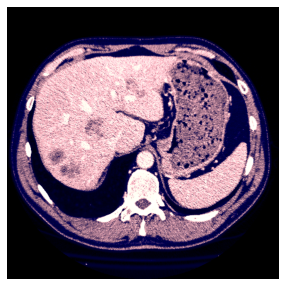

In [ ]:
# Check an input for a test file
#show_image(test_files[0])
show_image(test_files[test_slice_idx])
#show_image(test_files[501])

In [ ]:
# Get predictions for a Test file

test_dl = learn0.dls.test_dl(test_files)
preds,y = learn0.get_preds(dl=test_dl)

#predicted_mask = np.argmax(preds, axis=1)
#print(type(predicted_mask))
#print(predicted_mask[test_slice_idx].shape)
#plt.imshow(predicted_mask[test_slice_idx])

<class 'fastai.torch_core.TensorImage'>


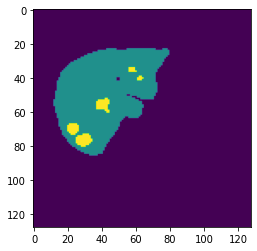

In [ ]:
predicted_mask = np.argmax(preds, axis=1)
print(type(predicted_mask))
#print(predicted_mask[test_slice_idx].shape)
plt.imshow(predicted_mask[test_slice_idx])
#plt.imshow(predicted_mask[0])

In [ ]:
#a=np.array(predicted_mask[0])
a=np.array(predicted_mask[test_slice_idx])
unique, counts = np.unique(a, return_counts=True)
print( np.array((unique, counts)).T)

np.amin(a),np.amax(a),

[[    0 13639]
 [    1  2571]
 [    2   174]]


(0, 2)

-----------------------------------JUNK------------------------------------------




### Getting predictions done on multiple images.

../input/trained-model

In [ ]:

def nii_tfm_selctive(fn,wins,curr_slice): 
    slices = []
    test_nii  = read_nii(fn)
    data = tensor(test_nii[...,curr_slice].astype(np.float32))
    data = (data.to_nchan(wins)*255).byte()
    slices.append(TensorImage(data))
    return slices

def check(img):
    cnt,h = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(cnt) > 0:
        return 1
    else:
        return 0
    

nums = [3,4,5]
vol_names = ['volume-100.nii','volume-102.nii','volume-102.nii']
seg_names = ['segmentation-100.nii','segmentation-102.nii','segmentation-102.nii']


conf_matrix =  np.zeros((2,2),dtype = int)


for nums,vol_names,seg_names in zip(nums,vol_names,seg_names):
    curr_mask      = read_nii(df_files.loc[nums,'mask_dirname']+"/"+df_files.loc[nums,'mask_filename'])
    for curr_slice in tqdm(range(250,550,10)): # export every 10th slice for testing
        
        # for prediction
        test_file = nii_tfm_selctive(df_files.loc[nums,'dirname']+"/"+df_files.loc[nums,'filename'],[dicom_windows.liver, dicom_windows.custom],curr_slice)
        test_dl = learn0.dls.test_dl(test_file)
        preds, y = learn0.get_preds(dl=test_dl)
        
        predicted_mask = np.argmax(preds, axis=1)# getting the predicted mask
        plt.imshow(predicted_mask[0])
        a=np.array(predicted_mask[0])
        
        tumor_p = False
        
        print('curr slice:',curr_slice)
        
        unique = np.unique(a)
        print("predicted",unique)
        if 0 in unique:
            back_p = True
        else:
            back_p = False
        if 1 in unique:
            liver_p = True
        else:
            liver_p = False
        if 2 in unique:
            tumor_p = True
        else:
            tumor_p = False
        

        # for getiing the actual mask values
        mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
        tumor_t = False
        
        unique = np.unique(mask)
        print("actual:",unique)
        if 0 in unique:
            back_t = True
        else:
            back_t = False
        if 1 in unique:
            liver_t = True
        else:
            liver_t = False
        if 2 in unique:
            tumor_t = True
        else:
            tumor_t = False
            
        # populating the conf_matrix
        if tumor_p == True and tumor_t == True:
            conf_matrix[0,0] += 1
        if tumor_p == False and tumor_t == False:
            conf_matrix[1,1] += 1
        if tumor_p == False and tumor_t == True:
            conf_matrix[1,0] += 1
        if tumor_p == True and tumor_t == False:
            conf_matrix[0,1] += 1
            
        
print(conf_matrix)
            

  0%|          | 0/30 [00:00<?, ?it/s]

# Plot Confusion Matrix

In [ ]:
import seaborn as sns

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

NameError: ignored

## Converting the `.nii` files to jpg and converting the corresponding mask.
### This will later be used for validating the model

In [ ]:
nums = [3,4,5]
vol_names = ['volume-100.nii','volume-102.nii','volume-102.nii']
seg_names = ['segmentation-100.nii','segmentation-102.nii','segmentation-102.nii']

total_slice = 0
# print(df_files.loc[nums,'dirname']+"/"+df_files.loc[nums,'filename'])

for nums,vol_names,seg_names in zip(nums,vol_names,seg_names):
    curr_ct        = read_nii(df_files.loc[nums,'dirname']+"/"+df_files.loc[nums,'filename'])
    curr_mask      = read_nii(df_files.loc[nums,'mask_dirname']+"/"+df_files.loc[nums,'mask_filename'])
    curr_file_name = str(df_files.loc[nums,'filename']).split('.')[0]
    curr_dim       = curr_ct.shape[2] # 512, 512, curr_dim

    for curr_slice in tqdm(range(250,550,10)): # export every 10th slice for testing
        data = tensor(curr_ct[...,curr_slice].astype(np.float32))
        mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
        data.save_jpg(f"images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
        mask.save(f"mask/{curr_file_name}_slice_{curr_slice}_mask.png")
        total_slice = total_slice+1
        
print(total_slice)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

2135


#### Using opencv to find if the mask of an scan image is showing any of the features (background,liver and tumor). The data is being saved into a csv files. This can later be used to validate the model by comparing the model prediction with the csv files.

In [ ]:
import cv2 
import numpy as np
import os


def check(img):
    cnt,h = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(cnt) > 0:
        return 1
    else:
        return 0

f = open('true_values.csv',mode = 'w')

file_iterator = os.scandir('./mask')
for i in file_iterator:
    
    img = cv2.imread("./mask/"+i.name,-1)
    print(img.shape)
    
    # if only the background is visible
    if np.count_nonzero(img)==0:
        f.write('0,0,0\n')
    else:
        f.write('0,')
        # for liver
        img_liver = np.where(img == 1, 255, img)
        img_liver = np.where(img_liver == 2, 0, img)
        ret = check(img_liver)
        if ret:
            f.write('1,')
        else:
            f.write('0,')

        # for tumor
        img_tumor = np.where(img == 2, 255, img)
        img_tumor = np.where(img_tumor == 1, 0, img)
        ret = check(img_tumor)
        if ret:
            f.write('1')
        else:
            f.write('0')

        f.write('\n')

f.close()

-----------------------------------------JUNK-----------------------------------------------------

###PERFORMANCE METRICS -DICE LOSS AND IOU

In [ ]:
#PyTorch
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        #inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        #inputs = inputs.view(-1)
        #targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

DICE LOSS FUNCTION

In [ ]:
def my_dice(img1,img2):
 intersection = np.logical_and(img1, img2)
 union = np.logical_or(img1, img2)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice

numdata = np.asarray(predicted_mask[test_slice_idx])
print(numdata.shape)
#print(test_mask[..., test_slice_idx].shape)
#im1 = np.resize(test_mask[..., test_slice_idx], (128,128))
#print(im1.shape)
res = cv2.resize(test_mask[..., test_slice_idx], dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#print("Dice loss: " + my_dice(str(numdata), str(im1)))
print(res.shape)

(128, 128)
(128, 128)


In [ ]:
#print(DiceLoss().forward(numdata, im1))
print(abs(DiceLoss().forward(res, numdata)))

0.11669273015987902


IOU LOSS FUNCTION


In [ ]:
class IoULoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(IoULoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        #inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        #inputs = inputs.view(-1)
        #targets = targets.view(-1)
        
        #intersection is equivalent to True Positive count
        #union is the mutually inclusive area of all labels & predictions 
        intersection = (inputs * targets).sum()
        total = (inputs + targets).sum()
        union = total - intersection 
        
        IoU = (intersection + smooth)/(union + smooth)
                
        return 1 - IoU

In [ ]:
print(abs(IoULoss().forward(numdata, res)))

0.264167833612847


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-0.0026134433302362394 0.036572074257071326


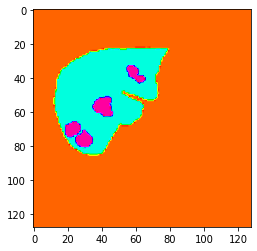

In [ ]:
#plt.imshow(numdata, cmap='hsv')
res = cv2.resize(test_mask[..., test_slice_idx], dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#res=res/255
#print(np.argmin(res), np.argmax(res))
norm = np.linalg.norm(res)
normal_array = res/norm
print(normal_array)
print(np.min(normal_array), np.max(normal_array))
#plt.imshow(res, cmap='hsv')
plt.imshow(res, cmap='hsv')

---------------------------------OTHER DICE FN--JUNK-------------------------------------

In [ ]:
def compute_val(met, x1, x2):
    met.reset()
    vals = [0,6,15,20]
    learn = TstLearner()
    for i in range(3):
        learn.pred,learn.yb = x1[vals[i]:vals[i+1]],(x2[vals[i]:vals[i+1]],)
        met.accumulate(learn)
    return met.value


In [ ]:
#pred = x1.argmax(1)
numdataf = numdata.astype(np.float)
resf = res.astype(np.float)
inter = (numdataf*resf).sum().item()
union = (numdataf+resf).sum().item()
test_eq(compute_val(Dice(), numdataf, resf), 2*inter/union)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


ModuleAttributeError: ignored

-----------------------------------------------JUNK-----------------------------------------------

VALIDATION

NO LIVER AND LESION


In [ ]:
tst = 65

# slice number
test_slice_idx = 70


test_nii   = read_nii(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'])
test_mask  = read_nii(df_files.loc[tst,'mask_dirname']+"/"+df_files.loc[tst,'mask_filename'])
print(test_nii.shape)

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

Number of test slices:  200


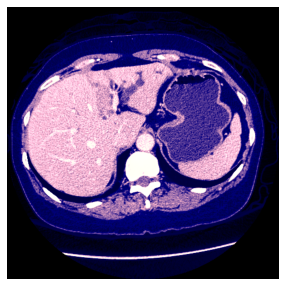

In [ ]:
# Prepare a nii test file for prediction 

test_files = nii_tfm(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'],[dicom_windows.liver, dicom_windows.custom])
print("Number of test slices: ",len(test_files))
show_image(test_files[test_slice_idx])

In [ ]:
test_dl = learn0.dls.test_dl(test_files)
preds,y = learn0.get_preds(dl=test_dl)

<class 'fastai.torch_core.TensorImage'>


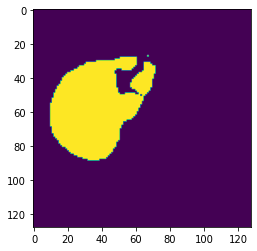

In [ ]:
predicted_mask = np.argmax(preds, axis=1)
print(type(predicted_mask))
#print(predicted_mask[test_slice_idx].shape)
plt.imshow(predicted_mask[test_slice_idx])
#plt.imshow(predicted_mask[0])

In [ ]:
numdata = np.asarray(predicted_mask[test_slice_idx])
res = cv2.resize(test_mask[..., test_slice_idx], dsize=(128, 128), interpolation=cv2.INTER_CUBIC)

In [ ]:
print(abs(DiceLoss().forward(numdata, res)))
print(abs(IoULoss().forward(numdata, res)))

0.0
0.0


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   39G   40G  50% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        86G   44G   43G  51% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13298580 kB
MemFree:        10160844 kB
MemAvailable:   12028416 kB
Buffers:          115952 kB
Cached:          1856772 kB
SwapCached:            0 kB
Active:          1386636 kB
Inactive:        1506080 kB
Active(anon):     827256 kB
Inactive(anon):      460 kB
Active(file):     559380 kB
Inactive(file):  1505620 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               848 kB
Writeback:             0 kB
AnonPages:        920024 kB
Mapped:           230816 kB
Shmem:              1212 kB
KReclaimable:      88048 kB
Slab:             136260 kB
SReclaimable:      88048 kB
SUnreclaim:        48212 kB
KernelStack:        5024 kB
PageTables:        12760 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649288 kB
Committed_AS:    3036072 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       47104 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18221644632925075823
 xla_global_id: -1]

In [7]:
!nvidia-smi -q -i 0 | grep "Product Name"

    Product Name                          : Tesla T4


In [8]:
!nvidia-smi

Wed May 25 09:23:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |    264MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-eee25d76-c812-62c8-3c0f-e3feff5c99c5)
